## Exemplary Quality Checks for Audio Signals

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook shows some exemplary analyses/checks that can be performed to evaluate the quality of audio signals. The [Free Spoken Digit Dataset](https://github.com/Jakobovski/free-spoken-digit-dataset) (FSDD) is used as example. Please download/clone the repository before executing this notebook.

In [1]:
import glob
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = '../data/free-spoken-digit-dataset/recordings/'  # path to dataset

### Load Dataset

The FSDD consists of a series of wav files containing recordings of single spoken digits `0-9` for different individuals. Each digit has been recorded multiple times for each individual. The recordings have been truncated individually resulting in different lengths. In the following, samples of recordings for the digit `0` are loaded into the list `X` and basic information on the dataset is extracted.

In [3]:
audiofiles = glob.glob(path + '0_*.wav', recursive=True)

X = []
for filepath in audiofiles:
    fs, x = wavfile.read(filepath)
    x = x/2**15
    X.append(x)

In [4]:
print('Total number of examples: {}'.format(len(X)))
print('Sampling rate fs = {} Hz'.format(fs))

Total number of examples: 300
Sampling rate fs = 8000 Hz


### Individual Signals

First insights into the dataset are gained by plotting individual signals. This may provide answers to questions like:

* are the waveforms plausible for the population of signals?
* are the signals well leveled (e.g. not clipped)?
* do all signals have comparable levels?
* what is the typical amplitude range of the signals?
* are there (major) artifacts visible?
* how much variation is in the population?
* are there any distinct features observable?
* ...

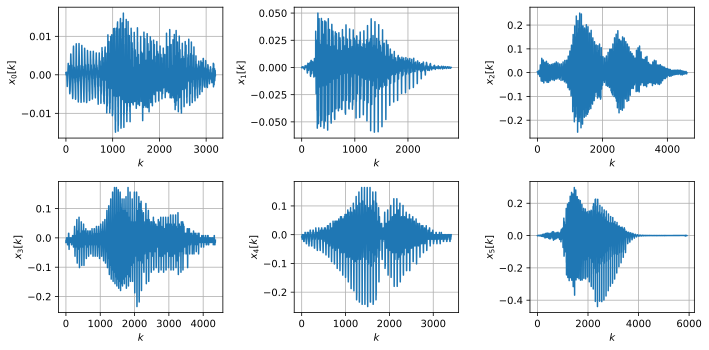

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(10,5))

for idx, ax in enumerate(axs.flat):
    ax.plot(X[idx])
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'$x_{}[k]$'.format(idx))
    ax.grid()

plt.tight_layout()

### Magnitude Spectra

The (magnitude) spectra of signals provides insights into the spectral composition of signals. It has proven to be a powerful tool for their analysis. Inspecting the magnitude spectrum of individual signals may provide answers to questions like:

* is the magnitude spectrum plausible for the population of signals?
* do the signals cover the full bandwidth?
* are there (major) artifacts visible?
* how much variation is in the population?
* are there distinct features in the spectrum?
* ...

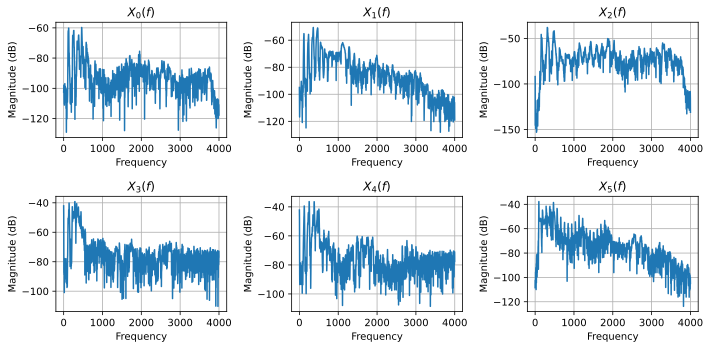

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(10,5))

for idx, ax in enumerate(axs.flat):
    ax.magnitude_spectrum(X[idx], Fs=fs, window=None, scale='dB')
    ax.set_title(r'$X_{}(f)$'.format(idx))
    ax.grid()
    
plt.tight_layout()

### Spectrogram

The [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) provides insights into the time-frequency structure of signals. For instance the variation of the spectral contents over time. It is especially for the analysis of non-stationary signals. Inspecting the spectrogram of individual signals my provide answers to questions like:

* is the magnitude spectrum plausible for the population of signals?
* are there (major) artifacts visible?
* are there distinct features in the spectrum?
* is the signal stationary/non-stationary?
* ...

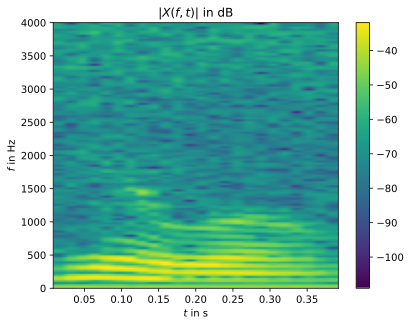

In [7]:
plt.specgram(X[20], Fs=fs, mode='magnitude', scale='dB');
plt.ylabel(r'$f$ in Hz')
plt.xlabel(r'$t$ in s')
plt.title(r'$|X(f,t)|$ in dB')
plt.colorbar();

### Probability Density Function

The histogram provides an estimate of the probability density function (PDF) of the population of examples. It provides insights into the average statistical properties of the examples, especially in terms of their amplitude distribution. It may be used to address the following questions:

* is the estimated PDF plausible for the population of signals?
* are there distinct features in the PDF?
* ...

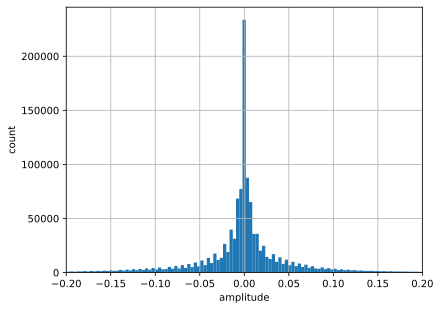

In [8]:
plt.hist(np.hstack(X), bins=500);
plt.xlabel('amplitude')
plt.ylabel('count')
plt.xlim([-.2,.2])
plt.grid()

### Selected Statistical Properties

Computing selected statistical properties of the signals in the dataset may provide additional valuable insights for quality checks. In the following we take a look at the mean values $\mu_n$ and the variances $\sigma_n$ of the examples $x_n[k]$.

In machine learning it is often assumed that the data is mean free. Inspection of the mean values $\mu_n$ in comparison to the maximum/minimum values of the examples shows if the examples are (approximately) mean free. This is illustrated in the following

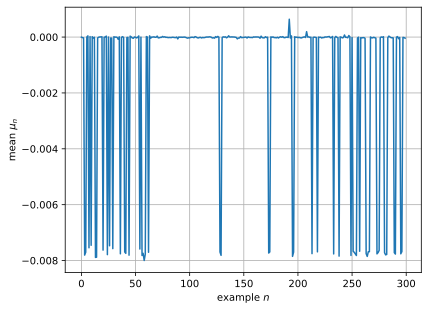

In [9]:
mu = [np.mean(X[idx]) for idx in range(len(X))]

plt.plot(mu)
plt.xlabel(r'example $n$')
plt.ylabel(r'mean $\mu_n$')
plt.grid()

The variance $\sigma_n^2$ of the examples constitutes an estimate of their average power per sample. In machine learning it is often assumed that the amplitude variation of the example population does not differ to much, e.g. is normalized. Hence, inspection of the variance provides insights into the level variations of the examples. This is illustrated in the following

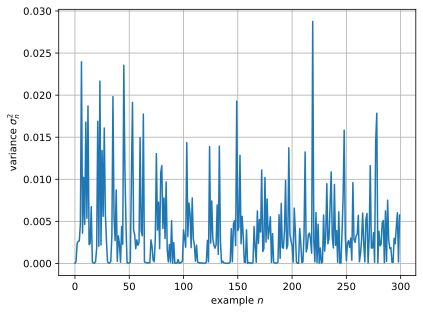

In [10]:
mu = [np.var(X[idx]) for idx in range(len(X))]

plt.plot(mu)
plt.xlabel(r'example $n$')
plt.ylabel(r'variance $\sigma^2_n$')
plt.grid()

### Auditory Analysis

An auditory analysis of audio signals, e.g. by simple listening, may provide additional insights. Especially when a machine learning approach is aiming at mimicking human performance.

`0_george_11.wav`

<audio src="../data/free-spoken-digit-dataset/recordings/0_george_11.wav" controls>

`0_jackson_13.wav`

<audio src="../data/free-spoken-digit-dataset/recordings/0_jackson_13.wav" controls>

`0_lucas_45.wav`

<audio src="../data/free-spoken-digit-dataset/recordings/0_lucas_45.wav" controls>

`0_nicolas_26.wav`

<audio src="../data/free-spoken-digit-dataset/recordings/0_nicolas_26.wav" controls>

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.